

# Logistic Regression with Python




## Objectives

* Use scikit Logistic Regression to classify
* Bulid a classifier for customer churn analysis


In this notebook, we will use Logistic Regression, and then, create a model for a telecommunication company, to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#preprocessing">Data pre-processing and selection</a></li>
        <li><a href="#modeling">Modeling (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">


The objective of the __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.


In [1]:
!pip install scikit-learn==0.23.1

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [114 lines of output]
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
    Obtaining dependency information for setuptools from https://files.pythonhosted.org/

Let's first import required libraries:


In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

To download the data, we will use `!wget` to download it from IBM Object Storage.


In [2]:
#Click here and press Shift+Enter
!wget -O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2024-03-18 14:00:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.10K  --.-KB/s    in 0.001s  

2024-03-18 14:00:57 (22.9 MB/s) - ‘ChurnData.csv’ saved [35943/35943]



## Load Data From CSV File  


In [7]:
#Click here and press Shift+Enter
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'
churn_df = pd.read_csv(url)
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
churn_df.shape

(200, 28)

In [6]:
churn_df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [8]:
churn_df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [43]:
corr_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless']].corr()
corr_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,0.426530,-0.070590
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,0.170404,-0.065527
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,0.209204,-0.146478
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.019969,-0.029635
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,-0.071178,0.267670
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,0.266612,-0.101187
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,-0.087051,0.386735
callcard,0.426530,0.170404,0.209204,-0.019969,-0.071178,0.266612,-0.087051,1.000000,0.220118
wireless,-0.070590,-0.065527,-0.146478,-0.029635,0.267670,-0.101187,0.386735,0.220118,1.000000


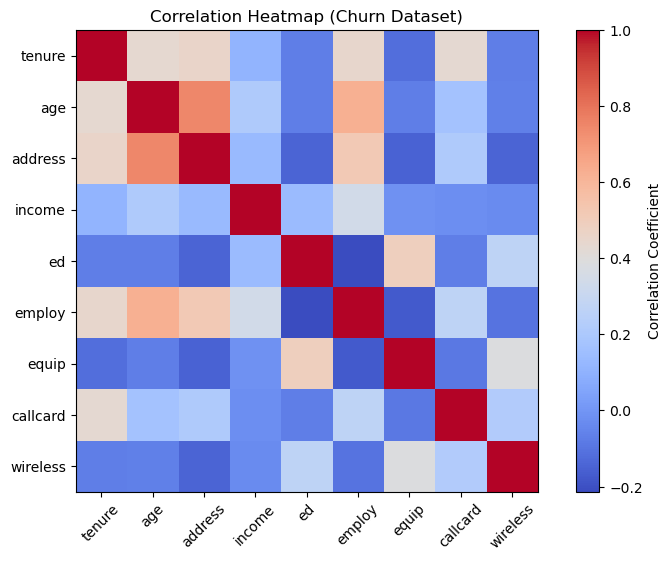

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the churn_df and check_df as created in the previous response

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Create heatmap with color scale
plt.imshow(corr_df, cmap='coolwarm')

# Add colorbar to show correlation strength
plt.colorbar(label='Correlation Coefficient')

# Set labels for each axis using column names from check_df
plt.xticks(np.arange(len(corr_df.columns)), corr_df.columns, rotation=45)
plt.yticks(np.arange(len(corr_df.columns)), corr_df.columns)

# Add title
plt.title("Correlation Heatmap (Churn Dataset)")

# Display the plot
plt.show()


<h2 id="preprocessing">Data pre-processing and selection</h2>


Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:


In [18]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [19]:
churn_df.shape
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

Let's define X, and y for our dataset:


In [20]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [21]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Also, we normalize the dataset:


In [22]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train/Test dataset


We split our dataset into train and test set:


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>


Let's build our model using __LogisticRegression__ from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now let's fit our model with train set:


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:


In [25]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):


In [26]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

<h2 id="evaluation">Evaluation</h2>


### jaccard index
Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.



In [27]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

### confusion matrix
Another way of looking at the accuracy of the classifier is to look at __confusion matrix__.


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


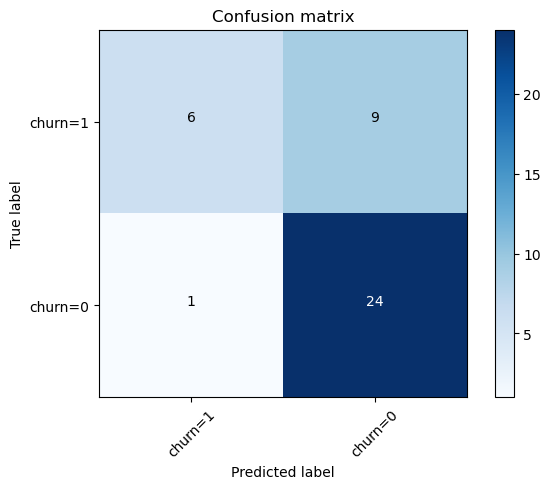

In [29]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Let's look at first row. The first row is for customers whose actual churn value in the test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
Out of these 15 cases, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. 

This means, for 6 customers, the actual churn value was 1 in test set and classifier also correctly predicted those as 1. However, while the actual label of 9 customers was 1, the classifier predicted those as 0, which is not very good. We can consider it as the error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 


The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about the confusion matrix is that it shows the model’s ability to correctly predict or separate the classes.  In a specific case of the binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 


In [30]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate the precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.


### log loss
Now, let's try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [31]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101187


Try to build Logistic Regression model again for the same dataset, but this time, use different __solver__ and __regularization__ values? What is new __logLoss__ value?


In [34]:
# Example using solver='lbfgs' and C=1.0
new_LR = LogisticRegression(C=1.0, solver='lbfgs').fit(X_train, y_train)
new_LR

LogisticRegression()

In [35]:
yhat2 = new_LR.predict(X_test)
yhat2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

##### predict probability

In [36]:
yhat_prob2 = new_LR.predict_proba(X_test)
yhat_prob2

array([[0.75, 0.25],
       [0.93, 0.07],
       [0.83, 0.17],
       [0.95, 0.05],
       [0.84, 0.16],
       [0.71, 0.29],
       [0.77, 0.23],
       [0.91, 0.09],
       [0.26, 0.74],
       [0.95, 0.05],
       [0.85, 0.15],
       [0.89, 0.11],
       [0.58, 0.42],
       [0.33, 0.67],
       [0.92, 0.08],
       [0.63, 0.37],
       [0.63, 0.37],
       [0.71, 0.29],
       [0.64, 0.36],
       [0.78, 0.22],
       [0.92, 0.08],
       [0.64, 0.36],
       [0.96, 0.04],
       [0.55, 0.45],
       [0.62, 0.38],
       [0.98, 0.02],
       [0.6 , 0.4 ],
       [0.68, 0.32],
       [0.72, 0.28],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.77, 0.23],
       [0.29, 0.71],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.89, 0.11],
       [0.22, 0.78],
       [0.7 , 0.3 ],
       [0.94, 0.06],
       [0.72, 0.28]])

### Jaccard index

In [37]:
jaccard_score(y_test, yhat2,pos_label=0)

0.6944444444444444

### Confusion matrix

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat2, labels=[1,0]))

[[ 4 11]
 [ 0 25]]


Confusion matrix, without normalization
[[ 4 11]
 [ 0 25]]


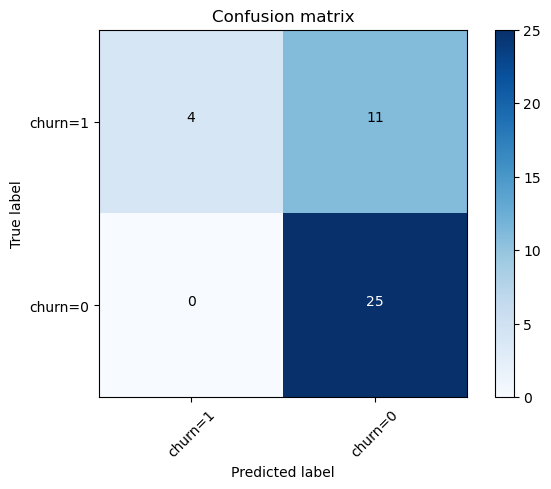

In [39]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [40]:
print (classification_report(y_test, yhat2))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40



### Log loss

In [41]:
log_loss(y_test, yhat_prob2)

0.6258716651263538

In [46]:
# Define a list of solvers to try (e.g., 'lbfgs', 'sag', 'saga')
solvers = ['lbfgs', 'sag', 'saga']

# Define a list of regularization parameters (C values) to try (e.g., 0.01, 0.1, 1.0)
C_values = [0.01, 0.1, 1.0]


Results for solver: lbfgs, C: 0.01
Confusion matrix, without normalization
[[ 0 15]
 [ 0 25]]


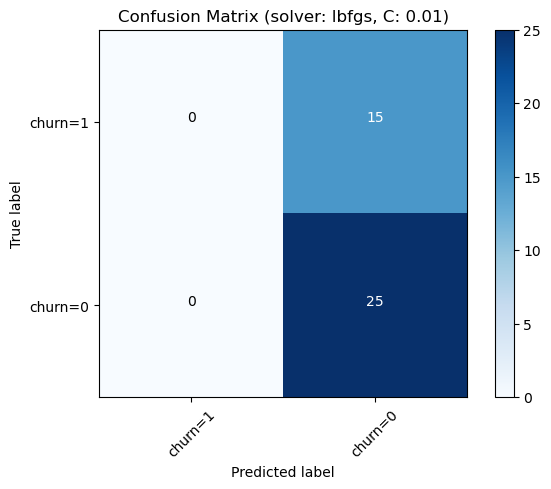

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.62      1.00      0.77        25
           1       0.00      0.00      0.00        15

    accuracy                           0.62        40
   macro avg       0.31      0.50      0.38        40
weighted avg       0.39      0.62      0.48        40

Log Loss: 0.6114289549584184
--------------------------------------------------
Results for solver: lbfgs, C: 0.1
Confusion matrix, without normalization
[[ 4 11]
 [ 0 25]]


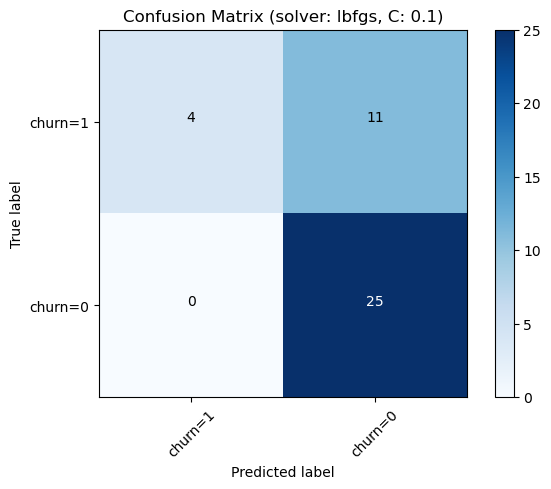

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40

Log Loss: 0.5918883907528564
--------------------------------------------------
Results for solver: lbfgs, C: 1.0
Confusion matrix, without normalization
[[ 4 11]
 [ 0 25]]


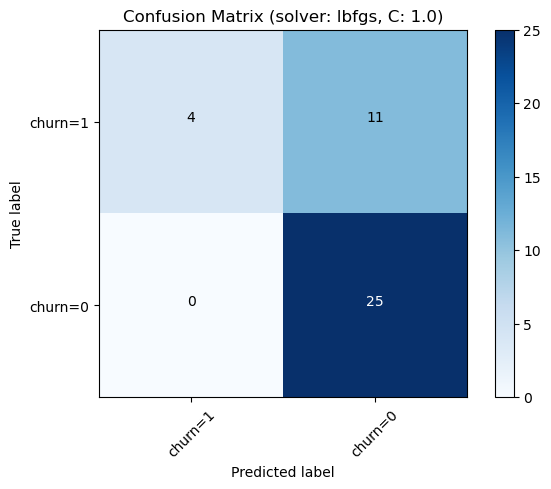

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40

Log Loss: 0.6258716651263538
--------------------------------------------------
Results for solver: sag, C: 0.01
Confusion matrix, without normalization
[[ 0 15]
 [ 0 25]]


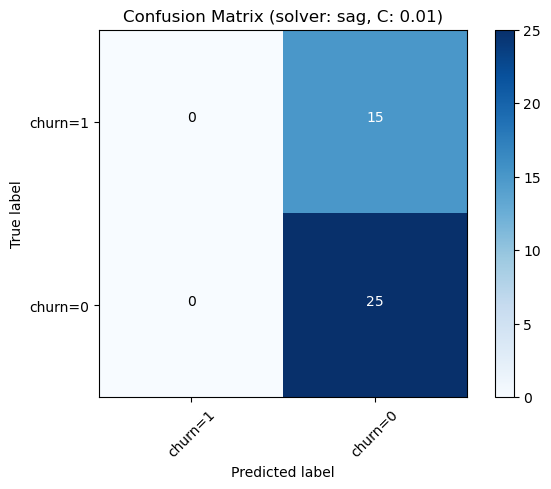

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.62      1.00      0.77        25
           1       0.00      0.00      0.00        15

    accuracy                           0.62        40
   macro avg       0.31      0.50      0.38        40
weighted avg       0.39      0.62      0.48        40

Log Loss: 0.6114220505934131
--------------------------------------------------
Results for solver: sag, C: 0.1
Confusion matrix, without normalization
[[ 4 11]
 [ 0 25]]


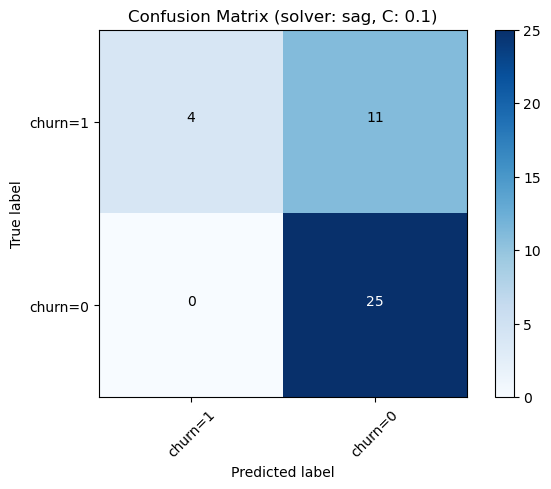

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40

Log Loss: 0.5918808883341452
--------------------------------------------------
Results for solver: sag, C: 1.0
Confusion matrix, without normalization
[[ 4 11]
 [ 0 25]]


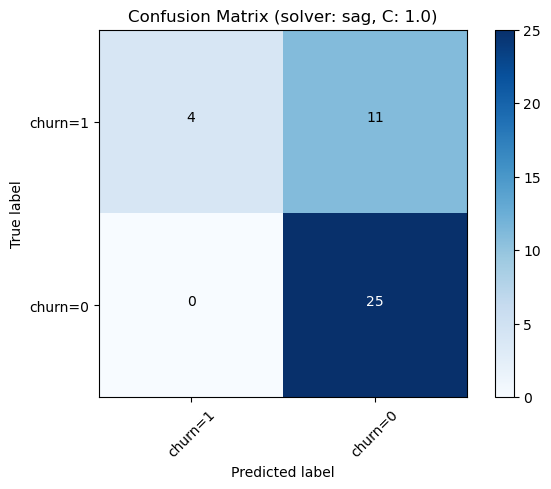

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40

Log Loss: 0.6258929838338468
--------------------------------------------------
Results for solver: saga, C: 0.01
Confusion matrix, without normalization
[[ 0 15]
 [ 0 25]]


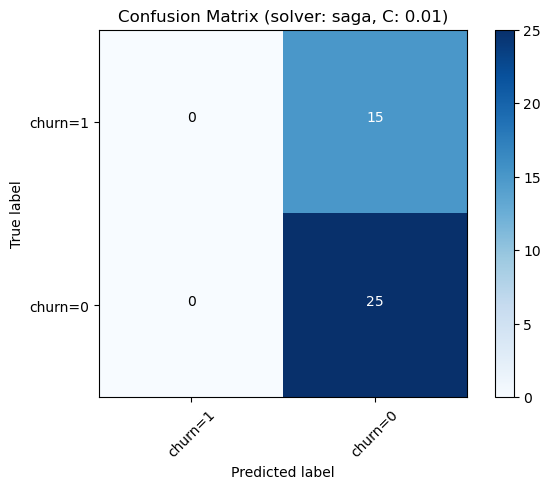

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.62      1.00      0.77        25
           1       0.00      0.00      0.00        15

    accuracy                           0.62        40
   macro avg       0.31      0.50      0.38        40
weighted avg       0.39      0.62      0.48        40

Log Loss: 0.6113585200747294
--------------------------------------------------
Results for solver: saga, C: 0.1
Confusion matrix, without normalization
[[ 4 11]
 [ 0 25]]


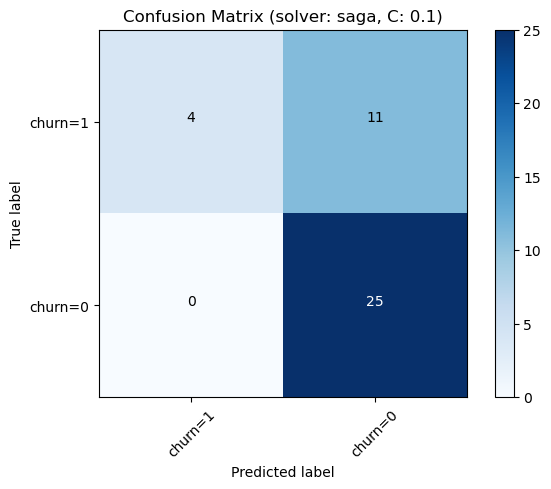

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40

Log Loss: 0.5918555866653616
--------------------------------------------------
Results for solver: saga, C: 1.0
Confusion matrix, without normalization
[[ 4 11]
 [ 0 25]]


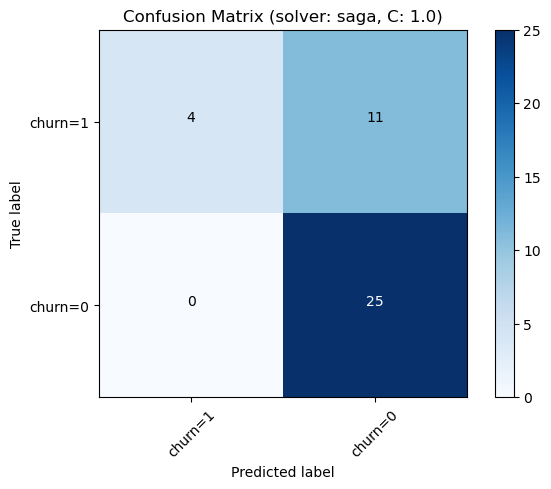

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40

Log Loss: 0.6258311808543879
--------------------------------------------------


In [47]:
for solver in solvers:
  for C in C_values:
    # Build the model with current solver and C
    model = LogisticRegression(C=C, solver=solver).fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)  # Get class probabilities

    # Evaluate the model
    print(f"Results for solver: {solver}, C: {C}")

    # Confusion Matrix (optional)
    cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
    plot_confusion_matrix(cnf_matrix, classes=['churn=1', 'churn=0'], normalize=False, title=f'Confusion Matrix (solver: {solver}, C: {C})')
    plt.show()  # To display the confusion matrix plot

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Log Loss
    log_loss_value = log_loss(y_test, y_pred_proba)
    print(f"Log Loss: {log_loss_value}")

    print("-" * 50)  # Separator for different model evaluations


# Conclusion:

The Logistic Regression model achieved a moderate level of accuracy in predicting customer churn. However, due to the class imbalance in the data (more non-churn cases than churn cases), the model struggled to identify churn customers effectively.

# Key Findings:

The model performed well in identifying non-churn cases but had low recall for churn cases, indicating it missed many actual churners.
There were no significant differences in performance across the tested solvers (lbfgs, sag, saga).
Increasing the regularization parameter (C) generally improved performance for the non-churn class but worsened it for the churn class.